# Binomial Trees for Option Pricing

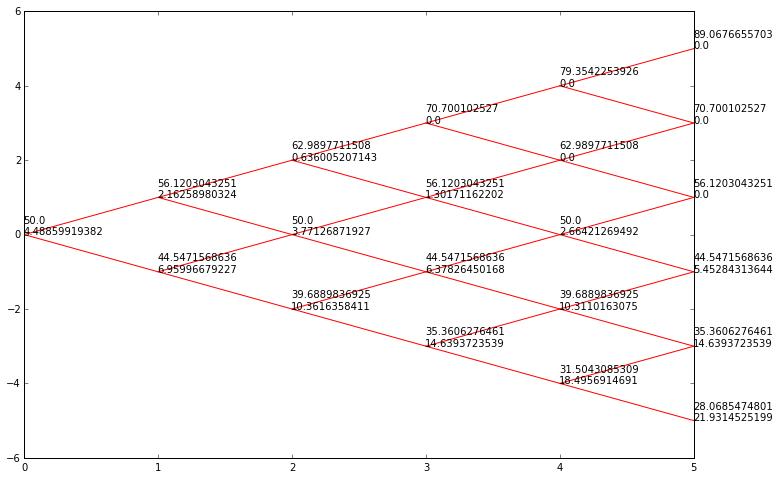

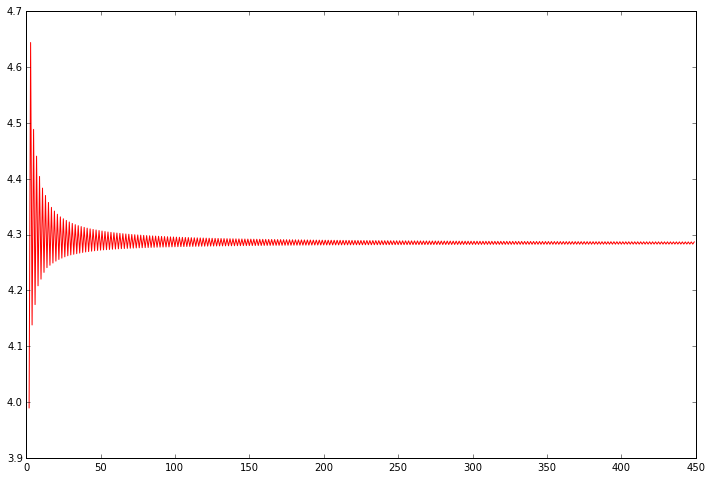

In [13]:
import numpy as np
from math import exp, sqrt, pow

def BinomialTree(S, K, r, sigma, T, n):
    dt = T/n
    u = exp(sigma*sqrt(dt))
    d = exp(-sigma*sqrt(dt))
    a = exp(r*dt)
    p = (a - d)/(u - d)
    vL =[np.zeros((j,2)) for j in range(1, n+2)]
    for j in range(0,n+1):
        vL[n][j][0] = S*pow(u,j)*pow(d,n-j)
        vL[n][j][1] = max(K-vL[n][j][0],0)
    for i in range(n-1,-1,-1):
        for j in range(0,i+1):
            vL[i][j][0] = S*pow(u,j)*pow(d,(i-j))
            vL[i][j][1] = max(K-S*pow(u,j)*pow(d,(i-j)), exp(-r*dt)*(p*vL[i+1][j+1][1] + (1-p)*vL[i+1][j][1]))
    return vL        

def drawBinomialTree(n,bt):
    dx,dy=1,1
    vL =[np.zeros((j,2)) for j in range(1, n+2)]
    figure(figsize(12,8))   
    for i in range(0,n+1,):
        for j in range(0,i+1):
            vL[i][j][0] = i*dx
            vL[i][j][1] = j*dy -(i-j)*dy
            text(vL[i][j][0],vL[i][j][1], str(bt[i][j][0]) + "\n" + str(bt[i][j][1]))
         
    for i in range(n-1,-1,-1):
        for j in range(0,i+1):
            plot((vL[i][j][0], vL[i+1][j][0]), (vL[i][j][1], vL[i+1][j][1]),'r')
            plot((vL[i][j][0], vL[i+1][j+1][0]), (vL[i][j][1], vL[i+1][j+1][1]),'r')
    show()
    
bt = BinomialTree(50,50,0.1,0.4,0.4167,5)
drawBinomialTree(5,bt)

x = range(2,450)
y = [BinomialTree(50,50,0.1,0.4,0.4167,n)[0][0][1] for n in x]
figure()
plot(x,y,'r')
show()